# Data for Prediction coffee price task

In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

###  About the data

For price prediction tasks always hard to find an adequate dataset. My task is to collect and preprocess data for such specific tasks.Also create function for filtration data(which will be helpful for people who want to get data and do not have any programming skills)

If you have to work with prices you always need to have economic data such a GDP, GDP per capita,  inflation index (CPI) etc.

In [3]:
df_cpi = pd.read_csv("data/data/CPI.csv")
df_cpi.head(5) 

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,CPI,TOT,AGRWTH,M,1973-09,6.543496,NaN
1,AUT,CPI,TOT,AGRWTH,M,1973-10,7.012194,NaN
2,AUT,CPI,TOT,AGRWTH,M,1973-11,7.966616,NaN
3,AUT,CPI,TOT,AGRWTH,M,1973-12,7.849054,NaN
4,AUT,CPI,TOT,AGRWTH,M,1974-01,8.128263,NaN


In [4]:
df_gdp = pd.read_csv("data/data/GDP.csv")
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [5]:
df_gdp_per_c = pd.read_csv("data/data/GDP-per-capita.csv")
df_gdp_per_c.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,373.361116,445.893298,553.300289,603.537023,669.009051,638.612543,629.345250,569.577923,561.778746,585.850064
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.579014,3347.844900,3531.416878,4299.008136,4539.467689,4804.633826,4707.578098,3683.552607,3308.772828,4170.312280
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3952.830781,4131.872341,4537.862492
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,37231.815671,39146.548836


In [6]:
df_rural = pd.read_csv("data/data/rural-population.csv")
df_rural.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population,SP.RUR.TOTL,26685.0,27297.0,27693.0,27934.0,28108.0,28278.0,...,56978.0,57401.0,57891.0,58231.0,58513.0,58827.0,59121.0,59362.0,59547.0,59692.0
1,Afghanistan,AFG,Rural population,SP.RUR.TOTL,8240568.0,8370722.0,8506983.0,8649584.0,8798513.0,8954113.0,...,20929063.0,21415472.0,21966159.0,22593984.0,23280573.0,23997724.0,24703806.0,25368831.0,25985093.0,26558736.0
2,Angola,AGO,Rural population,SP.RUR.TOTL,5054316.0,5131812.0,5208828.0,5285253.0,5358588.0,5427638.0,...,9077595.0,9237647.0,9398363.0,9559552.0,9720241.0,9878849.0,10032988.0,10183690.0,10329915.0,10472420.0
3,Albania,ALB,Rural population,SP.RUR.TOTL,1114818.0,1146208.0,1180553.0,1214693.0,1248887.0,1282417.0,...,1473922.0,1432259.0,1393502.0,1358266.0,1324613.0,1291587.0,1258985.0,1226200.0,1195854.0,1167112.0
4,Andorra,AND,Rural population,SP.RUR.TOTL,5572.0,5609.0,5616.0,5601.0,5554.0,5482.0,...,9221.0,9365.0,9442.0,9442.0,9372.0,9261.0,9157.0,9093.0,9082.0,9120.0


In [7]:
df_agricul = pd.read_csv("data/data/agricultural-land.csv")
df_agricul.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN
1,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,...,58.067580,58.067580,58.069111,58.067580,58.067580,58.067580,58.067580,58.067580,NaN,NaN
2,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,...,46.274164,46.755434,46.835646,47.316917,47.316917,47.477340,47.477340,47.477340,NaN,NaN
3,Albania,ALB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.000000,44.890511,45.145985,...,43.102190,43.843066,43.843066,43.832117,43.843066,43.332117,42.857299,42.857664,NaN,NaN
4,Andorra,AND,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,...,44.170213,44.191489,42.063830,42.063830,39.914894,40.021277,40.021277,40.021277,NaN,NaN


In [8]:
df_coffee = pd.read_csv("data/data/coffee-prices-historical-chart-data.csv")
df_coffee.head()

,date,value
0,1973-09-04,0.6432
1,1973-09-05,0.6370
2,1973-09-06,0.6360
3,1973-09-07,0.6380
4,1973-09-10,0.6335


In [9]:
df_disaster = pd.read_csv("data/data/disaster_in_coffee_region.csv", encoding="ISO-8859-1")
df_disaster.head()

,Start date,End date,Country,ISO,Location,Latitude,Longitude,Magnitude value,Magnitude scale,Disaster type,Disaster subtype,Disaster name,Disaster No.
0,26/03/1973,26/03/1973,Brazil,BRA,"East, Central, along Cartinga",NaN,NaN,NaN,Km2,Flood,--,NaN,1973-0019
1,/03/1974,/03/1974,Brazil,BRA,Most of the country,NaN,NaN,NaN,Km2,Flood,--,NaN,1974-0015
2,/05/1974,/05/1974,Brazil,BRA,North East (Ceara),NaN,NaN,NaN,NaN,Landslide,Landslide,NaN,1974-0024
3,23/10/1974,23/10/1974,Brazil,BRA,Sao Tome,NaN,NaN,NaN,NaN,Landslide,Landslide,NaN,1974-0053
4,01/01/1974,01/01/1974,Brazil,BRA,Sao Paulo,NaN,NaN,NaN,Vaccinated,Epidemic,Bacterial disease,NaN,1974-0127


That is all the data I mined. Perfectly I need daily price data (in my case coffee price), daily weather data, daily consumption and production data
As coffee production counties are poor and do not report systematically, I didn't have production data yet.

Also, I have trouble with weather data: a website with data is not available. https://governmentshutdown.noaa.gov/

Other sites give us At most 3 years of weather data, which does not suffice, because еhree years is inconclusive to describe economic trends; therefore, at least a 25-year period must be analyzed.

### Data for second Pipeline

In [10]:
def read_data():
    return pd.read_csv("data/data/GDP.csv"), pd.read_csv("data/data/GDP-per-capita.csv"), pd.read_csv("data/data/agricultural-land.csv"), pd.read_csv("data/data/rural-population.csv") 

def drop_col(df_gdp_per_c, df_gdp, df_agricul, df_rural):
    gdp_per_c = df_gdp_per_c.drop(['Country Name','Indicator Name', 'Indicator Code' ], axis=1)
    gdp = df_gdp.drop(['Country Name','Indicator Name', 'Indicator Code' ], axis=1)
    agricul = df_agricul.drop(['Country Name','Indicator Name', 'Indicator Code' ], axis=1)
    rural = df_rural.drop(['Country Name','Indicator Name', 'Indicator Code' ], axis=1)
    
    return(gdp_per_c, gdp, agricul, rural)

In [11]:
def get_merged_data():
    """
    () => data frame
    
    This function merges four datasets for second pipeline. 
    """
    gdp_per_c, gdp, agricul, rural = read_data()
    gdp_per_c, gdp, agricul, rural = drop_col(gdp_per_c, gdp, agricul, rural)
    gdp.index = gdp['Country Code']
    gdp_per_c.index = gdp['Country Code']
    agricul.index = gdp['Country Code']
    rural.index = gdp['Country Code']
    gdp_per_c = gdp_per_c.T
    agricul = agricul.T
    rural = rural.T
    gdp = gdp.T
    gdp = gdp.drop(['Country Code' ], axis=0)
    gdp_per_c = gdp_per_c.drop(['Country Code' ], axis=0)
    agricul = agricul.drop(['Country Code' ], axis=0)
    rural = rural.drop(['Country Code' ], axis=0)
    gdp.rename(columns=lambda x: x+' GDP', inplace=True)
    gdp_per_c.rename(columns=lambda x: x+' GDP per capita', inplace=True)
    agricul.rename(columns=lambda x: x+' Agricultural land', inplace=True)
    rural.rename(columns=lambda x: x+' Rural pop.', inplace=True)
    main = gdp.join(gdp_per_c).join(agricul).join(rural)
    main.to_csv("data/data/ecomonical_index.csv")
    return main
    

In [12]:
main = get_merged_data()

In [13]:
# amount of missing values
main.isnull().sum(axis = 0)

Country Code
ABW GDP           40
AFG GDP           19
AGO GDP           20
ALB GDP           24
AND GDP           10
ARB GDP            8
ARE GDP           15
ARG GDP            2
ARM GDP           30
ASM GDP           43
ATG GDP           17
AUS GDP            0
AUT GDP            0
AZE GDP           30
BDI GDP            0
BEL GDP            0
BEN GDP            0
BFA GDP            0
BGD GDP            0
BGR GDP           20
BHR GDP           20
BHS GDP            0
BIH GDP           34
BLR GDP           30
BLZ GDP            0
BMU GDP            4
BOL GDP            0
BRA GDP            0
BRB GDP           14
BRN GDP            5
                  ..
TLA Rural pop.     0
TLS Rural pop.     0
TMN Rural pop.     0
TON Rural pop.     0
TSA Rural pop.     0
TSS Rural pop.     0
TTO Rural pop.     0
TUN Rural pop.     0
TUR Rural pop.     0
TUV Rural pop.     0
TZA Rural pop.     0
UGA Rural pop.     0
UKR Rural pop.     0
UMC Rural pop.     0
URY Rural pop.     0
USA Rural pop.     0


In [14]:
main = main.drop(main.loc[:, main.isnull().sum() >10], axis=1)

In [15]:
main.isnull().sum(axis = 0)

Country Code
AND GDP           10
ARB GDP            8
ARG GDP            2
AUS GDP            0
AUT GDP            0
BDI GDP            0
BEL GDP            0
BEN GDP            0
BFA GDP            0
BGD GDP            0
BHS GDP            0
BLZ GDP            0
BMU GDP            4
BOL GDP            0
BRA GDP            0
BRN GDP            5
BWA GDP            0
CAF GDP            0
CAN GDP            0
CHE GDP           10
CHL GDP            0
CHN GDP            0
CIV GDP            0
CMR GDP            0
COD GDP            0
COG GDP            0
COL GDP            0
CRI GDP            0
CSS GDP            0
DEU GDP           10
                  ..
TKM Rural pop.     0
TLA Rural pop.     0
TLS Rural pop.     0
TMN Rural pop.     0
TON Rural pop.     0
TSA Rural pop.     0
TSS Rural pop.     0
TTO Rural pop.     0
TUN Rural pop.     0
TUR Rural pop.     0
TUV Rural pop.     0
TZA Rural pop.     0
UGA Rural pop.     0
UKR Rural pop.     0
UMC Rural pop.     0
URY Rural pop.     0


In [16]:
main.fillna(main.mean(), inplace=True)

In [17]:
def cleaning_data(dataset):
    dataset = dataset.drop(dataset.loc[:, dataset.isnull().sum() >10], axis=1)
    dataset.fillna(dataset.mean(), inplace=True)
    return dataset

In [18]:
def data_by_county( dataset, countries=None):
    """
    returns ready-to-use dataframe with economic indexes by country
    
    The data can be used for any economic prediction tasks.   
    
    """

    column = []
    if countries==None:
        return dataset
    else:
        for country in countries:
            for col in dataset.columns:
                if country in col:
                    column.append(col)
    return dataset[column]

In [19]:
# usage of pipelene
d = data_by_county(cleaning_data(get_merged_data()), ['BRA', 'ZWE'])

In [20]:
d.head(10)

Country Code,BRA GDP,BRA GDP per capita,BRA Agricultural land,BRA Rural pop.,ZWE GDP,ZWE GDP per capita,ZWE Agricultural land,ZWE Rural pop.
1960,210.027470,1.516557e+10,27.959874,38891711.0,280.994586,1.052990e+09,34.917175,3274901.0
1961,204.929302,1.523685e+10,18.010108,39315725.0,283.315869,1.096647e+09,28.396019,3374486.0
1962,260.225266,1.992629e+10,18.654031,39742281.0,279.440989,1.117602e+09,28.615743,3476215.0
1963,291.950589,2.302148e+10,19.323797,40154044.0,280.566213,1.159512e+09,28.835466,3571610.0
1964,261.331083,2.121189e+10,19.865784,40536437.0,285.053174,1.217138e+09,29.055189,3668154.0
1965,260.964693,2.179004e+10,20.386713,40883136.0,297.363437,1.311436e+09,29.223213,3765439.0
1966,315.277382,2.706272e+10,20.948919,41188409.0,281.490800,1.281750e+09,29.494636,3862905.0
1967,346.880100,3.059183e+10,21.486718,41456121.0,297.231875,1.397002e+09,29.714360,3960866.0
1968,374.083262,3.387588e+10,22.160792,41683417.0,304.982159,1.479600e+09,29.934083,4060357.0
1969,403.065252,3.745890e+10,23.184345,41876543.0,348.935805,1.747999e+09,30.153806,4163908.0


In [21]:
clean_d = data_by_county(cleaning_data(get_merged_data()))
clean_d.to_csv("data/data/clean_data.csv")

In [22]:
from sklearn import preprocessing
normalize = preprocessing.normalize(d)
normalize

array([[1.38156587e-08, 9.97594925e-01, 1.83920739e-09, 2.55830633e-03,
        1.84838931e-08, 6.92659679e-02, 2.29686036e-09, 2.15423795e-04],
       [1.34148348e-08, 9.97416615e-01, 1.17895593e-09, 2.57363857e-03,
        1.85460817e-08, 7.17873570e-02, 1.85882595e-09, 2.20896532e-04],
       [1.30388728e-08, 9.98428843e-01, 9.34680700e-10, 1.99133065e-03,
        1.40016977e-08, 5.59986559e-02, 1.43382322e-09, 1.74179571e-04],
       [1.26655876e-08, 9.98732488e-01, 8.38317347e-10, 1.74198848e-03,
        1.21717033e-08, 5.03026800e-02, 1.25095867e-09, 1.54945875e-04],
       [1.22997727e-08, 9.98355991e-01, 9.35000224e-10, 1.90788234e-03,
        1.34162733e-08, 5.72856490e-02, 1.36750753e-09, 1.72644829e-04],
       [1.19546789e-08, 9.98192016e-01, 9.33906433e-10, 1.87283865e-03,
        1.36220895e-08, 6.00763027e-02, 1.33870266e-09, 1.72493120e-04],
       [1.16368213e-08, 9.98879130e-01, 7.73220168e-10, 1.52025544e-03,
        1.03897658e-08, 4.73091023e-02, 1.08864077e-09, 1.

### Data For first pipeline


In [23]:
df_coffee.head(5)

,date,value
0,1973-09-04,0.6432
1,1973-09-05,0.6370
2,1973-09-06,0.6360
3,1973-09-07,0.6380
4,1973-09-10,0.6335


In [24]:
def make_average_monthly_data(df_coffee, month):
    date_value = {}
    counter = 0
    loc = 0
    loc_count = 0
    for index, row in df_coffee.iterrows():
        
        if month[counter] in row['date'] :

            if month[counter] not in date_value:
                date_value[month[counter]] = []
            loc_count += 1
            loc+= row[' value']
        else:

            date_value[month[counter]].append(loc/loc_count)
            loc = 0
            loc_count=0
            if '2018-12' in row['date']:
                break
            loc += row[' value']
            loc_count += 1
            counter += 1

    df = pd.DataFrame.from_dict(date_value, orient='index', columns=["coffee price"])
    
    return df

In [25]:
df = make_average_monthly_data(df_coffee,df_cpi['TIME'] )
df = df.sort_index()

In [26]:
df_cpi.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,CPI,TOT,AGRWTH,M,1973-09,6.543496,NaN
1,AUT,CPI,TOT,AGRWTH,M,1973-10,7.012194,NaN
2,AUT,CPI,TOT,AGRWTH,M,1973-11,7.966616,NaN
3,AUT,CPI,TOT,AGRWTH,M,1973-12,7.849054,NaN
4,AUT,CPI,TOT,AGRWTH,M,1974-01,8.128263,NaN


In [27]:
cpi = df_cpi.drop(['SUBJECT', 'INDICATOR', 'MEASURE', 'Flag Codes', 'FREQUENCY' ], axis=1)
names = cpi.LOCATION.unique()

In [28]:
def insert_data(list_of_countries, location, value):
    for c in list_of_countries:
        loc_df = df_cpi.loc[df_cpi[location] == c]
        df.insert(loc=1, column='{} CPI'.format(c), value=[i for i in loc_df[value]]) 

In [29]:
print(names)

['AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL' 'IRL'
 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NOR' 'POL' 'PRT' 'SVK' 'ESP' 'SWE'
 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'CHN' 'EST' 'IND' 'IDN' 'ISR' 'RUS'
 'SVN' 'ZAF' 'OECD' 'OECDE' 'G-7' 'COL' 'LVA' 'SAU' 'EU28' 'EA19' 'ARG'
 'LTU' 'CRI' 'G-20']


In [30]:
insert_data(['USA', 'IND', 'IDN', 'COL'], 'LOCATION', 'Value')
df.head()

,coffee price,COL CPI,IDN CPI,IND CPI,USA CPI
1973-09,0.652700,22.72727,44.00000,19.25078,7.363420
1973-10,0.659552,22.72727,42.30769,21.55440,7.801418
1973-11,0.646810,27.27273,30.63584,23.29897,8.254717
1973-12,0.670937,27.27273,27.17391,23.81443,8.705882
1974-01,0.716991,26.08696,42.54144,25.67010,9.389671


### Manual technics to rewrite dataset

In [31]:
df_disaster.head(25)

,Start date,End date,Country,ISO,Location,Latitude,Longitude,Magnitude value,Magnitude scale,Disaster type,Disaster subtype,Disaster name,Disaster No.
0,26/03/1973,26/03/1973,Brazil,BRA,"East, Central, along Cartinga",NaN,NaN,NaN,Km2,Flood,--,NaN,1973-0019
1,/03/1974,/03/1974,Brazil,BRA,Most of the country,NaN,NaN,NaN,Km2,Flood,--,NaN,1974-0015
2,/05/1974,/05/1974,Brazil,BRA,North East (Ceara),NaN,NaN,NaN,NaN,Landslide,Landslide,NaN,1974-0024
3,23/10/1974,23/10/1974,Brazil,BRA,Sao Tome,NaN,NaN,NaN,NaN,Landslide,Landslide,NaN,1974-0053
4,01/01/1974,01/01/1974,Brazil,BRA,Sao Paulo,NaN,NaN,NaN,Vaccinated,Epidemic,Bacterial disease,NaN,1974-0127
5,/07/1975,/07/1975,Brazil,BRA,Parana,NaN,NaN,NaN,ï¿½C,Extreme temperature,Cold wave,NaN,1975-0039
6,18/07/1975,18/07/1975,Brazil,BRA,"Pernambuco, Recife (North East areas)",NaN,NaN,NaN,Km2,Flood,--,NaN,1975-0042
7,/07/1975,/07/1975,Brazil,BRA,"Pernambuco, Recife (North East areas)",NaN,NaN,NaN,Vaccinated,Epidemic,Bacterial disease,NaN,1975-0068
8,/12/1975,/12/1975,Brazil,BRA,NaN,NaN,NaN,NaN,ï¿½C,Extreme temperature,Heat wave,NaN,1975-0145
9,/05/1977,/05/1977,Brazil,BRA,Recife,NaN,NaN,NaN,Km2,Flood,--,NaN,1977-0061


In [32]:
disaster = df_disaster.drop(['Location', 'Latitude','Longitude','Magnitude value','Magnitude scale', 'Disaster name', 'Disaster subtype', 'Disaster No.', 'Country'],
                            axis=1).drop([2392, 2393, 2394, 2395], axis=0)

In [33]:
disaster = disaster.rename(columns={'Disaster type': 'disaster'})
disaster.ISO.unique()

array(['BRA', 'COL', 'ETH', 'GTM', 'HND', 'IND', 'IDN', 'MEX', 'PER',
       'UGA', 'VNM'], dtype=object)

In [34]:
disaster.disaster.unique()

array(['Flood', 'Landslide', 'Epidemic', 'Extreme temperature ', 'Storm',
       'Drought', 'Earthquake', 'Insect infestation', 'Wildfire',
       'Mass movement (dry)', 'Volcanic activity'], dtype=object)

In [35]:
df.index

Index(['1973-09', '1973-10', '1973-11', '1973-12', '1974-01', '1974-02',
       '1974-03', '1974-04', '1974-05', '1974-06',
       ...
       '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11'],
      dtype='object', length=543)

In [36]:
disaster = disaster.drop(0, axis=0)

In [37]:
disaster

,Start date,End date,ISO,disaster
1,/03/1974,/03/1974,BRA,Flood
2,/05/1974,/05/1974,BRA,Landslide
3,23/10/1974,23/10/1974,BRA,Landslide
4,01/01/1974,01/01/1974,BRA,Epidemic
5,/07/1975,/07/1975,BRA,Extreme temperature
6,18/07/1975,18/07/1975,BRA,Flood
7,/07/1975,/07/1975,BRA,Epidemic
8,/12/1975,/12/1975,BRA,Extreme temperature
9,/05/1977,/05/1977,BRA,Flood
10,17/06/1977,17/06/1977,BRA,Storm


In [38]:
def disaster_to_timeline(disaster_df, month, countries, disasters):
    # BRA 0-10
    # COL 11-21
    # ETH 22-32
    # GTM 33-43
    # HND 44-54
    # IND 55-65
    # IDN 66-76
    # MEX 77-87
    # PER 88-98
    # UGA 99-109
    # VNM 110-120
    disaster= {'Flood':0, 'Landslide':1, 'Epidemic':2, 'Extreme temperature ': 3, 'Storm': 4,
       'Drought': 5, 'Earthquake': 6, 'Insect infestation': 7, 'Wildfire': 8,
       'Mass movement (dry)': 9, 'Volcanic activity': 10}
    contr = {'BRA':0, 'COL': 11, 'ETH':22, 'GTM':33, 'HND':44, 'IND':55, 'IDN':66, 'MEX':77, 'PER':88,
       'UGA':99, 'VNM':110}

    date_value = {}
    for i in month:
        date_value[i] = np.zeros(121)
    for index, row in disaster_df.iterrows():
        
        loc_row = row['Start date'].split('/')
        loc_end = row['End date'].split('/')
        if loc_row[1]=='' or loc_end[1]=='':
            for y in [int(loc_row[2]), int(loc_end[2])]:
                for i in range(1, 13):
                    if '{0}-{1}'.format(y, str(i).zfill(2)) in date_value:
                        date_value['{0}-{1}'.format(y, str(i).zfill(2))][disaster[row['disaster']]+contr[row['ISO']]] = 1
        elif loc_row[2] == loc_end[2]:
            for i in range(int(loc_row[1]), int(loc_end[1])+1):
                 if '{0}-{1}'.format(loc_end[2], str(i).zfill(2)) in date_value:
                        date_value['{0}-{1}'.format(loc_end[2], str(i).zfill(2))][disaster[row['disaster']]+contr[row['ISO']]] = 1
        elif loc_row[2] != loc_end[2]:
            
            for i in range(int(loc_row[1]), 13):
                 if '{0}-{1}'.format(loc_row[2], str(i).zfill(2)) in date_value:
                        date_value['{0}-{1}'.format(loc_row[2], str(i).zfill(2))][disaster[row['disaster']]+contr[row['ISO']]] = 1
            for i in range(1,  int(loc_end[1])+1):
                 if '{0}-{1}'.format(loc_end[2], str(i).zfill(2)) in date_value:
                        date_value['{0}-{1}'.format(loc_end[2], str(i).zfill(2))][disaster[row['disaster']]+contr[row['ISO']]] = 1
        

    col = ['{0} {1}'.format(c, d) for c in countries for d in disasters]
    df = pd.DataFrame.from_dict(date_value, orient='index', columns=col)
    return df

In [39]:
data = disaster_to_timeline(disaster, df.index, ['BRA', 'COL', 'ETH', 'GTM', 'HND', 'IND', 'IDN', 'MEX', 'PER',
       'UGA', 'VNM'], ['Flood', 'Landslide', 'Epidemic', 'Extreme temperature ', 'Storm',
       'Drought', 'Earthquake', 'Insect infestation', 'Wildfire',
       'Mass movement (dry)', 'Volcanic activity'])
data = data.sort_index()


In [40]:
df= df.join(data, how='left', lsuffix='_left', rsuffix='_right')
df

,coffee price,COL CPI,IDN CPI,IND CPI,USA CPI,BRA Flood,BRA Landslide,BRA Epidemic,BRA Extreme temperature,BRA Storm,...,VNM Landslide,VNM Epidemic,VNM Extreme temperature,VNM Storm,VNM Drought,VNM Earthquake,VNM Insect infestation,VNM Wildfire,VNM Mass movement (dry),VNM Volcanic activity
1973-09,0.652700,22.727270,44.000000,19.250780,7.363420,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973-10,0.659552,22.727270,42.307690,21.554400,7.801418,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973-11,0.646810,27.272730,30.635840,23.298970,8.254717,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1973-12,0.670937,27.272730,27.173910,23.814430,8.705882,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974-01,0.716991,26.086960,42.541440,25.670100,9.389671,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974-02,0.756550,26.086960,46.703300,25.304880,10.023310,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974-03,0.732176,25.000000,47.282610,27.254510,10.392610,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974-04,0.714795,24.000000,49.206350,28.011750,10.091740,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974-05,0.730982,23.076920,49.206350,28.964860,10.706150,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974-06,0.725355,23.076920,43.216080,29.182160,10.859730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df.to_csv("data/data/data_for_renges.csv")

### Trying simple prediction

As we can see Linear Regression works bad on this data.
But PCA seems helpful here

In [42]:
x = df.iloc[:, 1::]
y = df.iloc[:, 0]
train_data, test_data, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
import time
def lin_reg(train_data, test_data, train_y, test_y):
    start_time = time.time()
    log_reg = LinearRegression().fit(train_data, train_y)
    lr_train_predicted = log_reg.predict(train_data)
    lr_test_predicted = log_reg.predict(test_data)

    perf = time.time() - start_time
    return lr_train_predicted, lr_test_predicted, perf
pred_train, pred_test, performance = lin_reg(train_data, test_data, train_y, test_y)

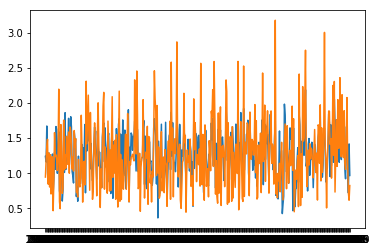

In [44]:
plt.plot(pred_train)
plt.plot(train_y)


In [45]:
scaler = StandardScaler()
scaler.fit(train_data)
train = scaler.transform(train_data)
test = scaler.transform(test_data)
def pca_(n):
    pca = PCA(n_components=n)
    pca.fit(train)
    return pca

In [46]:
pca50 = pca_(75)
train_ = pca50.transform(train)
test_ = pca50.transform(test)
_train, _test, performance = lin_reg(train_, test_, train_y, test_y)

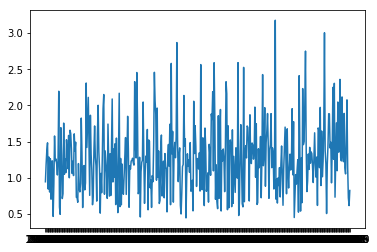

In [47]:
plt.plot(train_y)

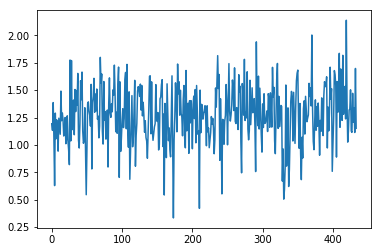

In [48]:
plt.plot(_train)

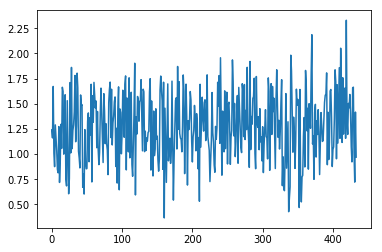

In [49]:
plt.plot(pred_train)

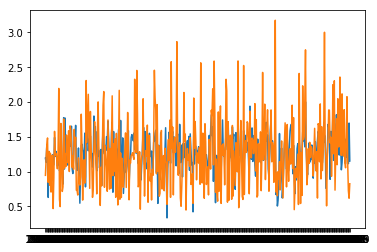

In [50]:
plt.plot(_train)
plt.plot(train_y)

In [53]:
from sklearn.metrics import r2_score

In [57]:
r2_score(train_y, _train)

0.29939936574500603

In [58]:
r2_score(test_y, pred_test)

0.3894856157727974

In [55]:
r2_score(train_y, pred_train)

0.4833867277874738

PCA here in not usable : it is bad to do dimentionality reduction with 126 dimentions

In [60]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor().fit(train_data, train_y)
train_predicted = ada.predict(train_data)
test_predicted = ada.predict(test_data)

In [62]:
ada.score(train_data, train_y)

0.5549474673544836

In [63]:
ada.score(test_data, test_y)

0.44346267772460063

Without weather it is hard to make good prediction

**Coffee price - mentions in media dependency**

I have done an experiment which aims to discover dependency between mentions a word “coffee” and similar words in media.
The experiment didn’t show any results because of a leak of data.
Where to find the data:

    -scrap the reuters.com archive(https://www.reuters.com/resources/archive/) (scraped less than 30 days before the site was down)
    
    -use a framework to access and analyze Global Database of Events, Language, and Tone (GDELT) 1.0 or 2.0  (github.com/linwoodc3/gdeltPyR)
    
Why experiment was not a successful ?
For this task not enough scraped data from reuters.com,
search for keywords (‘coffee’ and similar) in Global Database of Events didn’t show any results, even on International Coffee Day. Data collected there has some specification on events, not on the media.


## Data description


- **GDP** - GDP (current US)
- **GDP per capita** - (current US)
- **Agricultural land** - (% of land area)
- **Rural population**
- **ICO** - mounthly
- **Disaster** - Geophysical(Volcanic activity, Mass movement(dry), Landslide, Earthquake); Climatological (Wildfire, Drought); Biological (Epidemia, Insect infestation); Meteorogical (Extreme temperature, Storm, Fog)

### Data sources :

- www.ico.org - International Coffe Organization
- www.emdat.be - Université Catholique de Louvain's disaster database
- https://data.oecd.org/
- https://data.worldbank.org/


## Results:

- clean data in csv format ("data/data/clean_data.csv")
- monthly data in csv format ("data/data/data_for_renges.csv")